### Baseline

In [21]:

import pandas as pd


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate , train_test_split , StratifiedShuffleSplit
from sklearn import   linear_model, metrics
from sklearn.linear_model import SGDClassifier as SGD

import seaborn as sns

In [2]:
train_directory = "data/train.csv"

train = pd.read_csv(train_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [3]:
X = train[['age' , 'previous']][:]
y = train['y'][:]

In [4]:
classifier = RandomForestClassifier()

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                                     test_size = 0.2)

In [6]:
classifier.fit(train_data , train_labels)

C:\Users\21363\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
pred_labels = classifier.predict(test_data)

In [8]:
metrics.roc_auc_score(test_labels, pred_labels)

0.5375331564986737

### Решение

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

Input variables:  
**bank client data:**  
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
**related with the last contact of the current campaign:**  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
**other attributes:**  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
**social and economic context attributes**  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

In [3]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
train.info() #нет пропущенных значений - хорошо

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 21 columns):
age               3222 non-null int64
job               3222 non-null object
marital           3222 non-null object
education         3222 non-null object
default           3222 non-null object
housing           3222 non-null object
loan              3222 non-null object
contact           3222 non-null object
month             3222 non-null object
day_of_week       3222 non-null object
duration          3222 non-null int64
campaign          3222 non-null int64
pdays             3222 non-null int64
previous          3222 non-null int64
poutcome          3222 non-null object
emp.var.rate      3222 non-null float64
cons.price.idx    3222 non-null float64
cons.conf.idx     3222 non-null float64
euribor3m         3222 non-null float64
nr.employed       3222 non-null float64
y                 3222 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usage: 528.7+ KB


In [6]:
train.nunique()

age                67
job                12
marital             4
education           7
default             2
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          754
campaign           24
pdays              17
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         224
nr.employed        11
y                   2
dtype: int64

Сначала посмотрим на данные клиентов

In [36]:
train_cd = train[train.columns[0:7]]
train_cd['y'] = train[train.columns[-1]]

D:\Users\Const\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
train_cd.head()

,age,job,marital,education,default,housing,loan,y
0,30,blue-collar,married,basic.9y,no,yes,no,0
1,39,services,single,high.school,no,no,no,0
2,25,services,married,high.school,no,yes,no,0
3,38,services,married,basic.9y,no,unknown,unknown,0
4,47,admin.,married,university.degree,no,yes,no,0


In [38]:
train_cd['job'].value_counts().head()

admin.         796
blue-collar    707
technician     525
services       309
management     251
Name: job, dtype: int64

In [39]:
train_cd['y'].value_counts()

0    2860
1     362
Name: y, dtype: int64

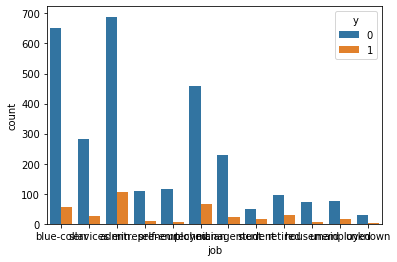

In [41]:
sns.countplot(x='job', hue='y', data=train_cd);

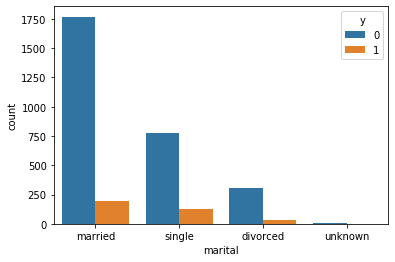

In [42]:
sns.countplot(x='marital', hue='y', data=train_cd);

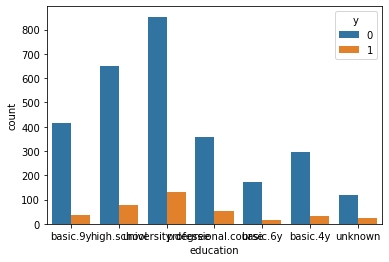

In [43]:
sns.countplot(x='education', hue='y', data=train_cd);

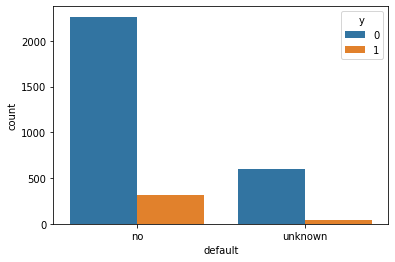

In [44]:
sns.countplot(x='default', hue='y', data=train_cd);